In [1]:
 
from  pyspark.sql import SparkSession
 
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
spark= SparkSession.builder.appName("sparkProject").getOrCreate()

23/12/14 10:13:47 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
schema=StructType([
    StructField('fullVisitors', IntegerType(), True),
    StructField('Channel',StringType(), True), 
    StructField('time', IntegerType(), True), 
    StructField('country', StringType(), True), 
    StructField('city', StringType(), True),
    StructField('timeOnsite', IntegerType(), True), 
    StructField('pageviews', IntegerType(), True), 
    StructField('date', IntegerType(), True),
    StructField('vistId', StringType(), True), 
    StructField('type', StringType(), True), 
    StructField('productprice', IntegerType(), True),
    StructField('Ptype', StringType(), True), 
    StructField('path', StringType(), True), 
    StructField('channelpath', StringType(), True)
])
 

In [6]:
data=spark.read.csv('/user/stark1/finaldataset.csv', schema=schema)

In [7]:
data.show(5)

+------------+--------------+-------+-------------+--------------------+----------+---------+--------+----------+----+------------+--------------------+--------------------+-----------+
|fullVisitors|       Channel|   time|      country|                city|timeOnsite|pageviews|    date|    vistId|type|productprice|               Ptype|                path|channelpath|
+------------+--------------+-------+-------------+--------------------+----------+---------+--------+----------+----+------------+--------------------+--------------------+-----------+
|        null|        Direct|  63131|United States|            New York|       117|        9|20160822|1471898479|PAGE|    16990000|Women's YouTube S...|Home/Shop by Bran...|    YouTube|
|        null|        Direct|  15249|       Taiwan|not available in ...|        73|        4|20160909|1473433346|PAGE|    16990000|Women's YouTube S...|Home/Shop by Bran...|    YouTube|
|        null|        Social| 262937|      Czechia|not available in ..

In [8]:
# find the unique product visitors for the websites
df1=data.select("vistId").distinct().show(3)

+----------+
|    vistId|
+----------+
|1474105417|
|1470462204|
|1470306858|
+----------+
only showing top 3 rows



In [9]:
#count total number of visitorsID
df2=data.groupBy("vistId").agg(count("vistId").alias("visitorsIDs")).show(5)

+----------+-----------+
|    vistId|visitorsIDs|
+----------+-----------+
|1474105417|          3|
|1470462204|         12|
|1470306858|          6|
|1474514917|         11|
|1475135812|         20|
+----------+-----------+
only showing top 5 rows



In [10]:
#get the top product from the provided dataset
df3=data.orderBy('productprice', ascending=False).show(3)

+------------+--------------+-----+-------------+--------------------+----------+---------+--------+----------+-----+------------+-------------------+----------------+-----------+
|fullVisitors|       Channel| time|      country|                city|timeOnsite|pageviews|    date|    vistId| type|productprice|              Ptype|            path|channelpath|
+------------+--------------+-----+-------------+--------------------+----------+---------+--------+----------+-----+------------+-------------------+----------------+-----------+
|        null|        Social|78941|United States|not available in ...|       111|        3|20160921|1474442503|EVENT|   250000000|Gift Card - $250.00|Home/Gift Cards/| Gift Cards|
|        null|Organic Search|70946|United States|not available in ...|       108|       12|20160807|1470635602| PAGE|   250000000|Gift Card - $250.00|Home/Gift Cards/| Gift Cards|
|        null|Organic Search|56338|United States|not available in ...|       221|        4|20160806|

In [11]:
import matplotlib.pyplot as plt
panda_data=data.toPandas()

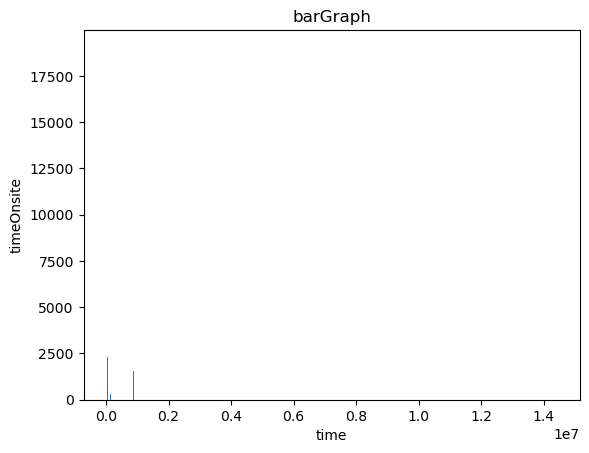

In [15]:
plt.bar(panda_data['time'],panda_data['timeOnsite'])
plt.xlabel('time')
plt.ylabel('timeOnsite')
plt.title('barGraph')
plt.show()

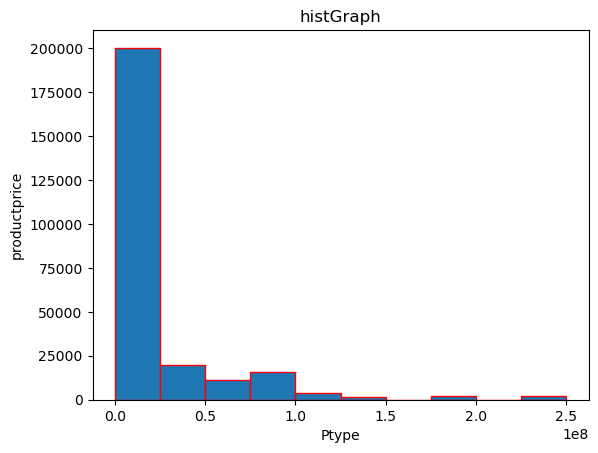

In [14]:
plt.hist(panda_data['productprice'],bins=10, edgecolor='red')
plt.xlabel('Ptype')
plt.ylabel('productprice')
plt.title('histGraph')
plt.show()
 